In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Решение дифференциального уравнения 2го порядка методом Рунге-Кутты четвертого порядка
Выполнил студент 1го магистратуры физического факультета филиала МГУ в городе Сарове: Пономаренко Дмитрий Сергеевич

Уравнение имеет вид:
\begin{equation}
\begin{aligned}
\frac{d^2x}{dt^2} + \delta\frac{dx}{dt} = \left\{
\begin{array}{lc}
-x - 0.1x^3, & x\leq 1\\
-1.1 & x > 1
\end{array}
\right\.
\end{aligned}
\end{equation}

$$v = \frac{dx}{dt}$$

## Линейные малые колебания без затухания

Колебания называются малыми, когда амплитуда << 1.

Зафикксируем начальные условия:
\begin{equation}
\begin{aligned}
\left\[ \begin{array}{l}
x_0 = 10^{-2} \\
\frac{dx}{dt}= 0 \\
\delta = 0
\end{array}
\right\.
\end{aligned}
\end{equation}

### Аналитическое решение:
$$x(t) = x_0*cos(t) $$

$$v(t) = -v_0*sin(t) $$



In [21]:
delta = 0
t_step = 0.01
omega = np.sqrt(1 - delta**2)
dtype=np.float128
an_t = np.arange(start=0.,stop=100.,step=t_step,dtype=dtype)
# an_x = np.arange(-2.,2,step=t_step)
shape = an_t.shape[0]
x, y = np.zeros(shape,dtype=dtype), np.zeros(shape,dtype=dtype)
x[0] = 0.1
y[0] = 0
k1_1, k2_1, k3_1,k4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
q1_1, q2_1, q3_1,q4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)


# mass = ['m1_1','m2_1','m3_1','m4_1','q1_2','q2_2','q3_2','q4_2']
for i in range(an_t.shape[0] - 1):
    if x[i] <= 1:
        k1_1[i] = -1 * t_step * (delta * y[i] + 0.1 * x[i] ** 3 + x[i])
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step * (delta * (y[i] + 0.5* k1_1[i]) + 0.1 * (x[i] + 0.5 * q1_1[i]) ** 3 + x[i] + 0.5 * q1_1[i])
        q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])

        k3_1[i] = -1 * t_step * (delta * (y[i] + 0.5*k2_1[i]) + 0.1 * (x[i] + 0.5 * q2_1[i]) ** 3 + x[i] + 0.5 * q2_1[i])
        q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])

        k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 0.1 * (x[i] + q3_1[i]) ** 3 + x[i] + q3_1[i])
        q4_1[i] = t_step * (y[i] + k3_1[i])

        x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
        y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
    # else:
    #     m1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
    #     q1_1[i] = t_step * (y[i])
    #
    #     m2_1[i] = -1 * t_step *( delta*(y[i] + m1_1[i]) + 1.1)
    #     q2_1[i] = t_step * (y[i]+0.5*m1_1[i])
    #
    #     m3_1[i] = -1 * t_step * (delta*(y[i] + m2_1[i]) + 1.1)
    #     q3_1[i] = t_step * (y[i]+0.5*m2_1[i])
    #
    #     m4_1[i] = -1 * t_step * (delta*(y[i] + m3_1[i]) + 1.1)
    #     q4_1[i] = t_step * (y[i]+m3_1[i])
    #
    #     x[i+1] = x[i] + 1/6 * (m1_1[i]+2*m2_1[i]+2*m3_1[i]+m4_1[i])
    #     y[i+1] = y[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])


        # m1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
        # m2_1[i] = -1 * t_step *(delta*(y[i] + m1_1[i]) + 1.1)
        # m3_1[i] = -1 * t_step * (delta*(y[i] + m2_1[i]) + 1.1)
        # m4_1[i] = -1 * t_step * (delta*(y[i] + m3_1[i]) + 1.1)
        # x[i+1] = x[i] + 1/6 * (m1_1[i]+2*m2_1[i]+2*m3_1[i]+m4_1[i])
        # q1_1[i] = t_step * (y[i] - 1.1)
        # q2_1[i] = t_step * (y[i]+0.5*q1_1[i]- 1.1)
        # q3_1[i] = t_step * (y[i]+0.5*q1_1[i]- 1.1)
        # q4_1[i] = t_step * (y[i]+q1_1[i]- 1.1)
        # y[i+1] = y[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])

In [22]:
c3 = x[0]
c2 = y[0]

x_an , y_an = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
# x_an[0], y_an[0]=x[0], y[0]
# exp_m = np.zeros(shape,dtype=dtype)
delta = delta

for i in range(an_t.shape[0]-1):
    # exp_m[i] = np.exp(-0.5 * (np.sqrt(delta**2-4)-delta)*an_t[i])
    x_an[i + 1] = c3 * np.cos(an_t[i])
    # y_an[i + 1] = np.exp(-1*(an_t[i]**2 /2+delta*an_t[i])) + c2
    y_an[i + 1] = -c3*np.sin(an_t[i])





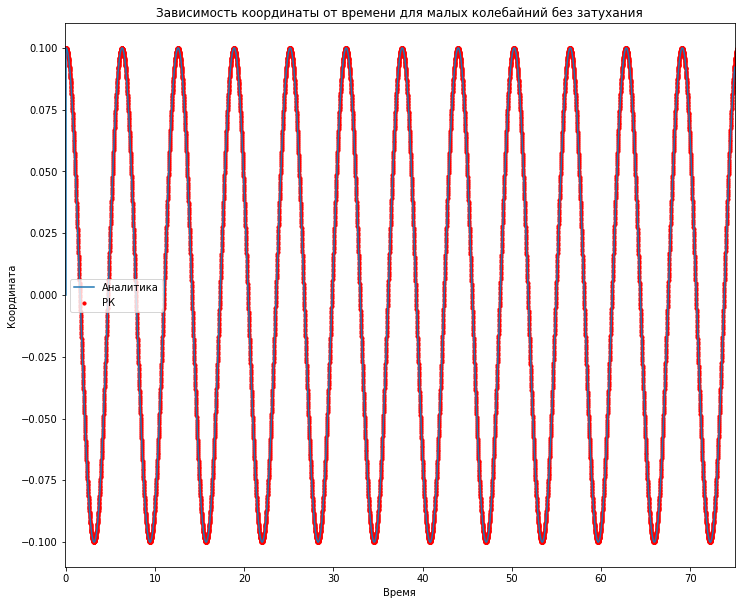

In [23]:

plt.figure(figsize=(12,10))
plt.title("Зависимость координаты от времени для малых колебайний без затухания")
plt.scatter(an_t,x,s=10,c='r',label='РК')
plt.plot(an_t,x_an,label='Аналитика')
plt.xlim(right=75,left=-0.1)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.show()



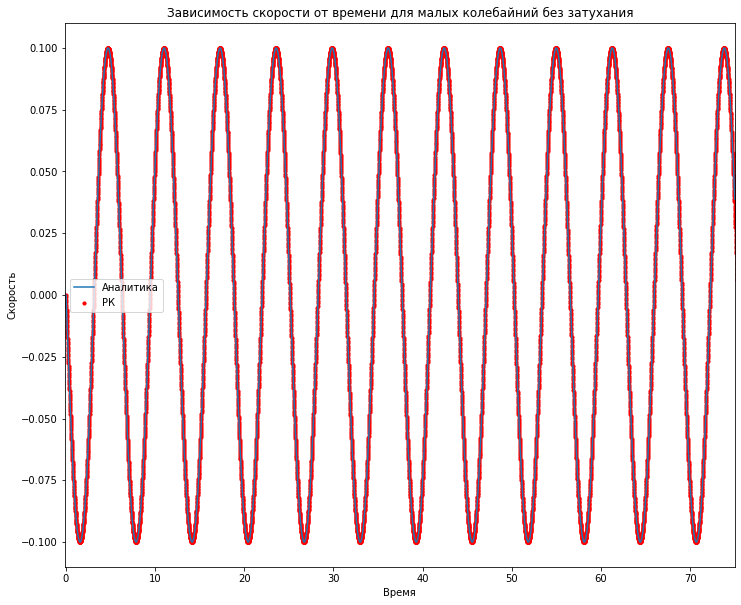

In [24]:
plt.figure(figsize=(12,10))
plt.scatter(an_t,y,label='РК',c='r',s=10)
plt.plot(an_t,y_an,label='Аналитика')

plt.title("Зависимость скорости от времени для малых колебайний без затухания")
plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Время')
plt.ylabel('Скорость')
plt.show()

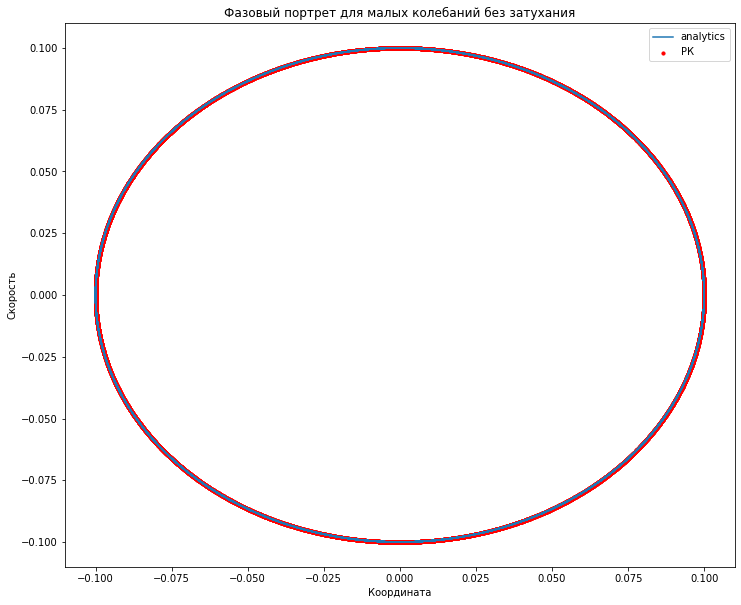

In [25]:
plt.figure(figsize=(12,10))
plt.scatter(x,y,label='РК',c='r',s=10)
plt.plot(x_an[1:],y_an[1:], label = "analytics")

plt.title("Фазовый портрет для малых колебаний без затухания")
# plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Координата')
plt.ylabel('Скорость')
plt.show()


----
## Малые колебания с затуханием

Колебания называются малыми, когда амплитуда << 1.

Зафикксируем начальные условия:
\begin{equation}
\begin{aligned}
\left\[ \begin{array}{l}
x_0 = 10^{-3} \\
\frac{dx}{dt}= 0 \\
\delta = 0.1
\end{array}
\right\.
\end{aligned}
\end{equation}

### Аналитическое решение:
$$x(t) = x_0*cos(t)\cdot e^{-\delta t/2} $$

$$v(t) = -v_0*sin(t)\cdot e^{-\delta t/2} $$

In [26]:
omega = np.sqrt(1 - delta**2)
dtype=np.float128
an_t = np.arange(start=0.,stop=100.,step=t_step,dtype=dtype)
# an_x = np.arange(-2.,2,step=t_step)
shape = an_t.shape[0]
x, y = np.zeros(shape,dtype=dtype), np.zeros(shape,dtype=dtype)
x[0] = 0.1
y[0] = 0
k1_1, k2_1, k3_1,k4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
q1_1, q2_1, q3_1,q4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)


delta = 0.1
# mass = ['m1_1','m2_1','m3_1','m4_1','q1_2','q2_2','q3_2','q4_2']
for i in range(an_t.shape[0] - 1):
    if x[i] <= 1:
        k1_1[i] = -1 * t_step * (delta * y[i] + 0.1 * x[i] ** 3 + x[i])
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step * (delta * (y[i] + 0.5* k1_1[i]) + 0.1 * (x[i] + 0.5 * q1_1[i]) ** 3 + x[i] + 0.5 * q1_1[i])
        q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])

        k3_1[i] = -1 * t_step * (delta * (y[i] + 0.5*k2_1[i]) + 0.1 * (x[i] + 0.5 * q2_1[i]) ** 3 + x[i] + 0.5 * q2_1[i])
        q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])

        k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 0.1 * (x[i] + q3_1[i]) ** 3 + x[i] + q3_1[i])
        q4_1[i] = t_step * (y[i] + k3_1[i])

        x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
        y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
    else:
        k1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step *( delta*(y[i] + k1_1[i]) + 1.1)
        q2_1[i] = t_step * (y[i]+0.5*k1_1[i])

        k3_1[i] = -1 * t_step * (delta*(y[i] + k2_1[i]) + 1.1)
        q3_1[i] = t_step * (y[i]+0.5*k2_1[i])

        k4_1[i] = -1 * t_step * (delta*(y[i] + k3_1[i]) + 1.1)
        q4_1[i] = t_step * (y[i]+k3_1[i])

        x[i+1] = x[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])
        y[i+1] = y[i] + 1/6 * (k1_1[i]+2*k2_1[i]+2*k3_1[i]+k4_1[i])


        # m1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
        # m2_1[i] = -1 * t_step *(delta*(y[i] + m1_1[i]) + 1.1)
        # m3_1[i] = -1 * t_step * (delta*(y[i] + m2_1[i]) + 1.1)
        # m4_1[i] = -1 * t_step * (delta*(y[i] + m3_1[i]) + 1.1)
        # x[i+1] = x[i] + 1/6 * (m1_1[i]+2*m2_1[i]+2*m3_1[i]+m4_1[i])
        # q1_1[i] = t_step * (y[i] - 1.1)
        # q2_1[i] = t_step * (y[i]+0.5*q1_1[i]- 1.1)
        # q3_1[i] = t_step * (y[i]+0.5*q1_1[i]- 1.1)
        # q4_1[i] = t_step * (y[i]+q1_1[i]- 1.1)
        # y[i+1] = y[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])

In [27]:
c3 = x[0]
c2 = y[0]

x_an , y_an = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
# x_an[0], y_an[0]=x[0], y[0]
# exp_m = np.zeros(shape,dtype=dtype)
delta = delta
omega = np.sqrt(1 - delta**2)
for i in range(an_t.shape[0]-1):
    # exp_m[i] = np.exp(-0.5 * (np.sqrt(delta**2-4)-delta)*an_t[i])
    x_an[i + 1] = np.exp(-delta/2*an_t[i]) * (c3) * np.cos(an_t[i]*(np.sqrt(4-delta**2)/2))

    # y_an[i + 1] = np.exp(-1*(an_t[i]**2 /2+delta*an_t[i])) + c2
    y_an[i + 1] = np.exp(-delta/2*an_t[i])* -c3 * np.sin(an_t[i]*(np.sqrt(4-delta**2)/2))





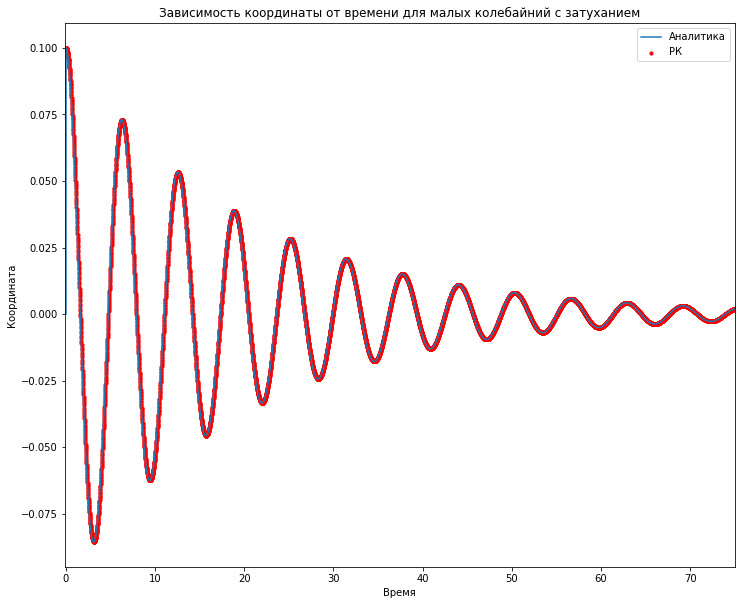

In [28]:

plt.figure(figsize=(12,10))
plt.title("Зависимость координаты от времени для малых колебайний с затуханием")
plt.scatter(an_t,x,s=10,c='r',label='РК')
plt.plot(an_t,x_an,label='Аналитика')
plt.xlim(right=75,left=-0.1)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.show()



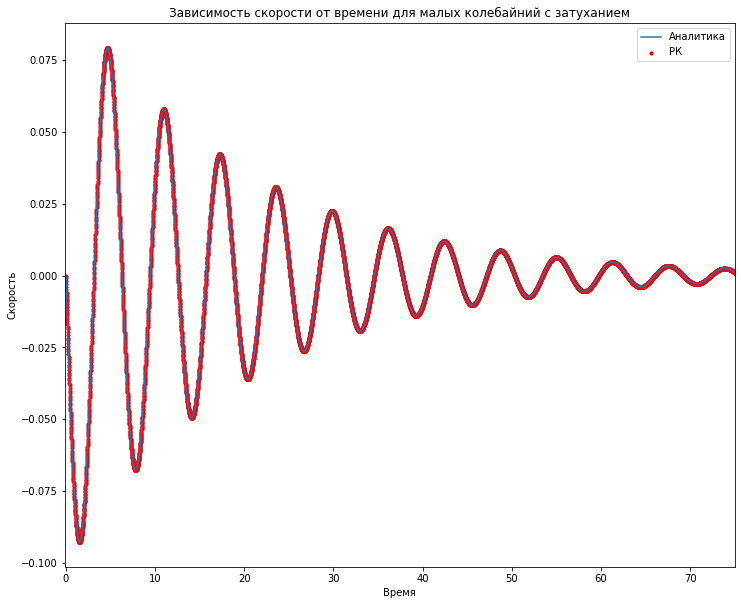

In [29]:
plt.figure(figsize=(12,10))
plt.scatter(an_t,y,label='РК',c='r',s=10)
plt.plot(an_t,y_an,label='Аналитика')

plt.title("Зависимость скорости от времени для малых колебайний с затуханием")
plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Время')
plt.ylabel('Скорость')
plt.show()

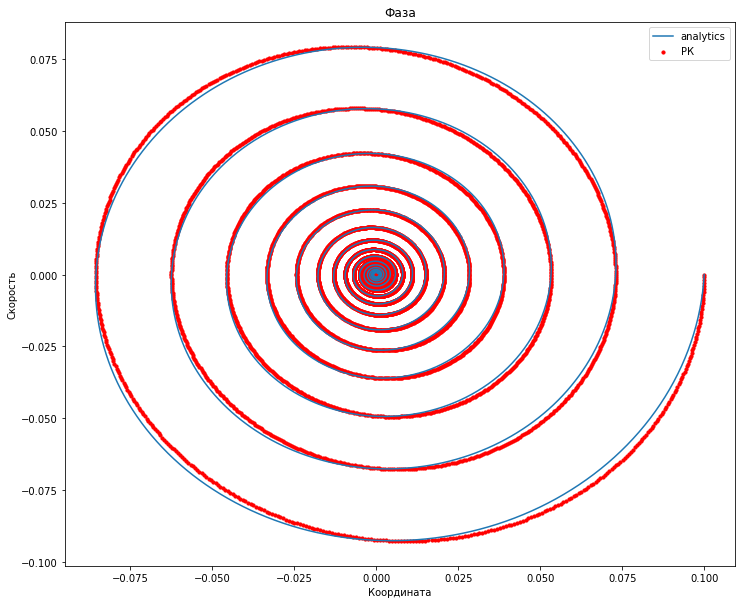

In [30]:
plt.figure(figsize=(12,10))
plt.scatter(x,y,label='РК',c='r',s=10)
plt.plot(x_an[1:],y_an[1:], label = "analytics")

plt.title("Фаза")
# plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Координата')
plt.ylabel('Скорость')
plt.show()

-------
## Апериодичное движение

\begin{equation}
\begin{aligned}
\left\[ \begin{array}{c}
x_0 = 2 \\
\frac{dx}{dt}= 0 \\
\delta = 1.5
\end{array}
\right\.
\end{aligned}
\end{equation}


In [ ]:
# omega = np.sqrt(1 - delta**2)
dtype=np.float128
an_t = np.arange(start=0.,stop=100.,step=t_step,dtype=dtype)
# an_x = np.arange(-2.,2,step=t_step)
shape = an_t.shape[0]
x, y = np.zeros(shape,dtype=dtype), np.zeros(shape,dtype=dtype)
x[0] = 2
y[0] = 0
k1_1, k2_1, k3_1,k4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
q1_1, q2_1, q3_1,q4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)


delta = 1.5
# mass = ['m1_1','m2_1','m3_1','m4_1','q1_2','q2_2','q3_2','q4_2']
for i in range(an_t.shape[0] - 1):
    if x[i] <= 1:
        k1_1[i] = -1 * t_step * (delta * y[i] + 0.1 * x[i] ** 3 + x[i])
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step * (delta * (y[i] + 0.5* k1_1[i]) + 0.1 * (x[i] + 0.5 * q1_1[i]) ** 3 + x[i] + 0.5 * q1_1[i])
        q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])

        k3_1[i] = -1 * t_step * (delta * (y[i] + 0.5*k2_1[i]) + 0.1 * (x[i] + 0.5 * q2_1[i]) ** 3 + x[i] + 0.5 * q2_1[i])
        q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])

        k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 0.1 * (x[i] + q3_1[i]) ** 3 + x[i] + q3_1[i])
        q4_1[i] = t_step * (y[i] + k3_1[i])

        x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
        y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
    else:
        k1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step *( delta*(y[i] + k1_1[i]) + 1.1)
        q2_1[i] = t_step * (y[i]+0.5*k1_1[i])

        k3_1[i] = -1 * t_step * (delta*(y[i] + k2_1[i]) + 1.1)
        q3_1[i] = t_step * (y[i]+0.5*k2_1[i])

        k4_1[i] = -1 * t_step * (delta*(y[i] + k3_1[i]) + 1.1)
        q4_1[i] = t_step * (y[i]+k3_1[i])

        x[i+1] = x[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])
        y[i+1] = y[i] + 1/6 * (k1_1[i]+2*k2_1[i]+2*k3_1[i]+k4_1[i])



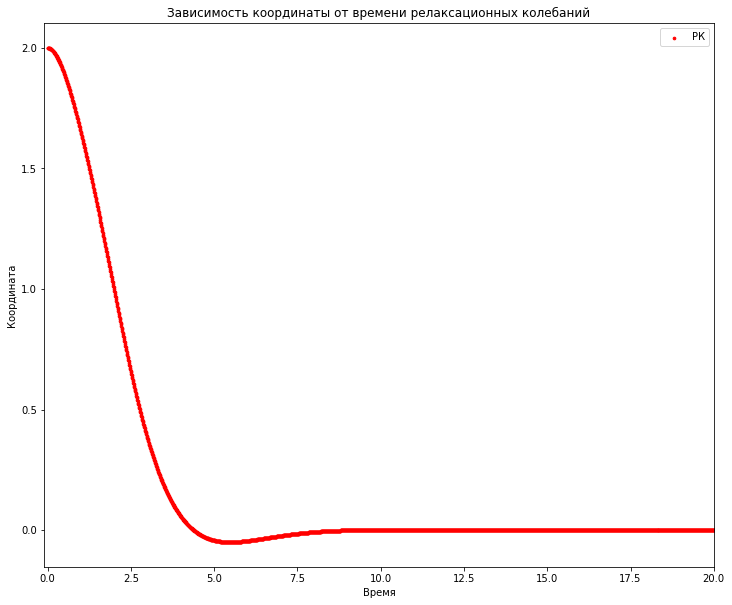

In [32]:

plt.figure(figsize=(12,10))
plt.title("Зависимость координаты от времени релаксационных колебаний")
plt.scatter(an_t,x,s=7,c='r',label='РК')
# plt.plot(an_t,x_an,label='Аналитика')
plt.xlim(right=20,left=-0.1)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.show()



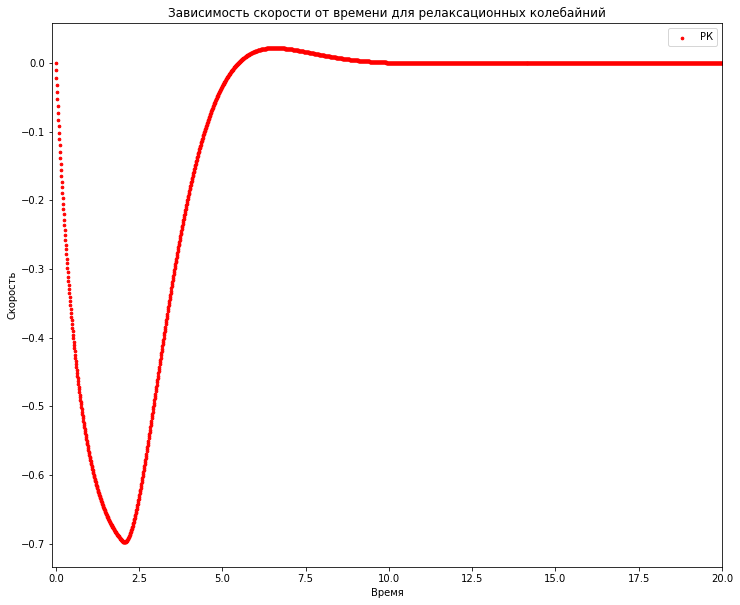

In [33]:
plt.figure(figsize=(12,10))
plt.scatter(an_t,y,label='РК',c='r',s=7)
# plt.plot(an_t,y_an,label='Аналитика')

plt.title("Зависимость скорости от времени для релаксационных колебайний")
plt.xlim(right=20,left=-0.1)
plt.legend()

plt.xlabel('Время')
plt.ylabel('Скорость')
plt.show()

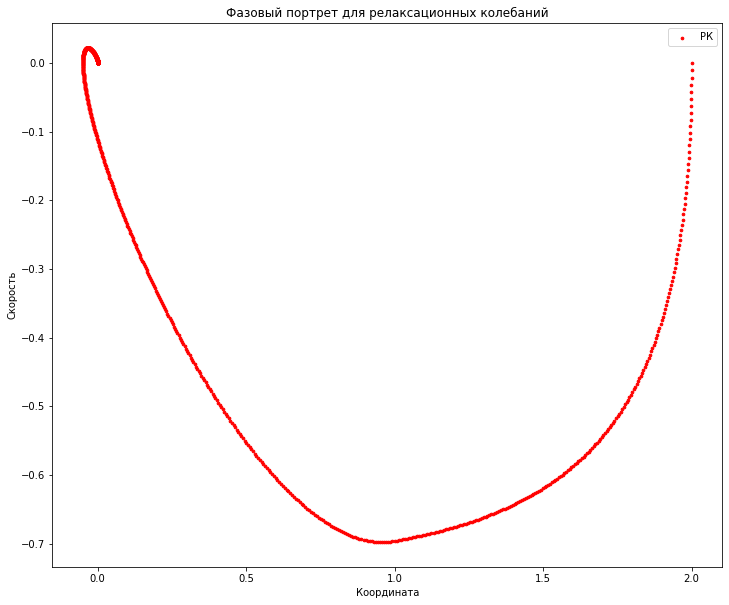

In [34]:
plt.figure(figsize=(12,10))
plt.scatter(x,y,label='РК',c='r',s=7)
# plt.plot(x_an[1:],y_an[1:], label = "analytics")

plt.title("Фазовый портрет для релаксационных колебаний")
# plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Координата')
plt.ylabel('Скорость')
plt.show()

---
## Нелинейные колебания
Колебания, когда амплуитуда >1, а значит мы не можем пренебречь $x^3$

\begin{equation}
\begin{aligned}
\left\[ \begin{array}{l}
x_0 = 6 \\
\frac{dx}{dt}= 0 \\
\delta = 0
\end{array}
\right\.
\end{aligned}
\end{equation}



dtype=np.float128
an_t = np.arange(start=0.,stop=100.,step=t_step,dtype=dtype)
# an_x = np.arange(-2.,2,step=t_step)
shape = an_t.shape[0]
x, y = np.zeros(shape,dtype=dtype), np.zeros(shape,dtype=dtype)
x[0] = 6
y[0] = 0
k1_1, k2_1, k3_1,k4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
q1_1, q2_1, q3_1,q4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)

delta = 0
# delta = 0
# mass = ['m1_1','m2_1','m3_1','m4_1','q1_2','q2_2','q3_2','q4_2']
for i in range(an_t.shape[0] - 1):
    if x[i] <= 1:
        k1_1[i] = -1 * t_step * (delta * y[i] + 0.1 * x[i] ** 3 + x[i])
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step * (delta * (y[i] + 0.5* k1_1[i]) + 0.1 * (x[i] + 0.5 * q1_1[i]) ** 3 + x[i] + 0.5 * q1_1[i])
        q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])

        k3_1[i] = -1 * t_step * (delta * (y[i] + 0.5*k2_1[i]) + 0.1 * (x[i] + 0.5 * q2_1[i]) ** 3 + x[i] + 0.5 * q2_1[i])
        q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])

        k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 0.1 * (x[i] + q3_1[i]) ** 3 + x[i] + q3_1[i])
        q4_1[i] = t_step * (y[i] + k3_1[i])

        x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
        y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
    else:
        k1_1[i] = -1 * t_step *( delta*y[i] + 1.1)
        q1_1[i] = t_step * (y[i])

        k2_1[i] = -1 * t_step *( delta*(y[i] + k1_1[i]) + 1.1)
        q2_1[i] = t_step * (y[i]+0.5*k1_1[i])

        k3_1[i] = -1 * t_step * (delta*(y[i] + k2_1[i]) + 1.1)
        q3_1[i] = t_step * (y[i]+0.5*k2_1[i])

        k4_1[i] = -1 * t_step * (delta*(y[i] + k3_1[i]) + 1.1)
        q4_1[i] = t_step * (y[i]+k3_1[i])

        x[i+1] = x[i] + 1/6 * (q1_1[i]+2*q2_1[i]+2*q3_1[i]+q4_1[i])
        y[i+1] = y[i] + 1/6 * (k1_1[i]+2*k2_1[i]+2*k3_1[i]+k4_1[i])


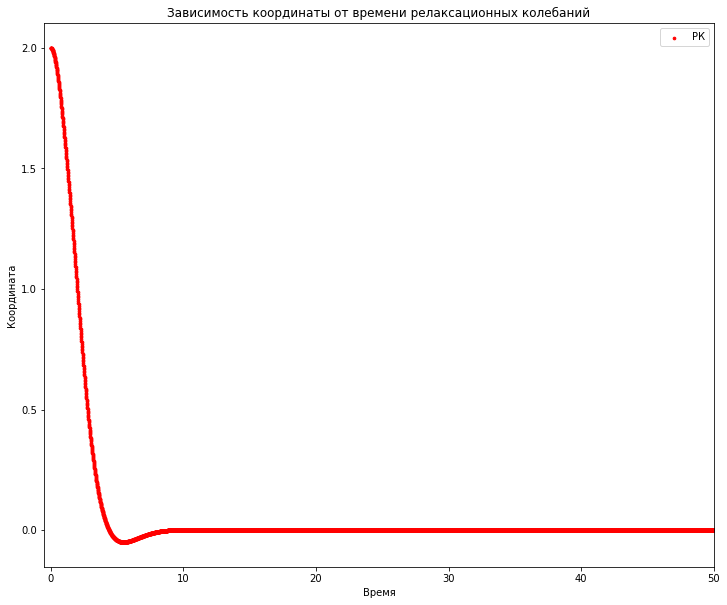

In [35]:

plt.figure(figsize=(12,10))
plt.title("Зависимость координаты от времени релаксационных колебаний")
plt.scatter(an_t,x,s=7,c='r',label='РК')
# plt.plot(an_t,x_an,label='Аналитика')
plt.xlim(left=-0.5,right=50)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.show()



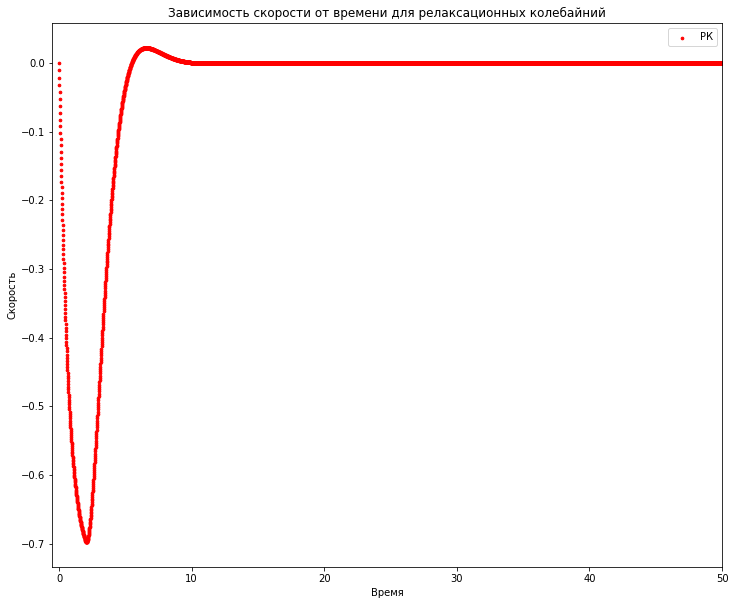

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(an_t,y,label='РК',c='r',s=7)
# plt.plot(an_t,y_an,label='Аналитика')

plt.title("Зависимость скорости от времени для релаксационных колебайний")
plt.xlim(left=-0.5,right=50)
plt.legend()

plt.xlabel('Время')
plt.ylabel('Скорость')
plt.show()

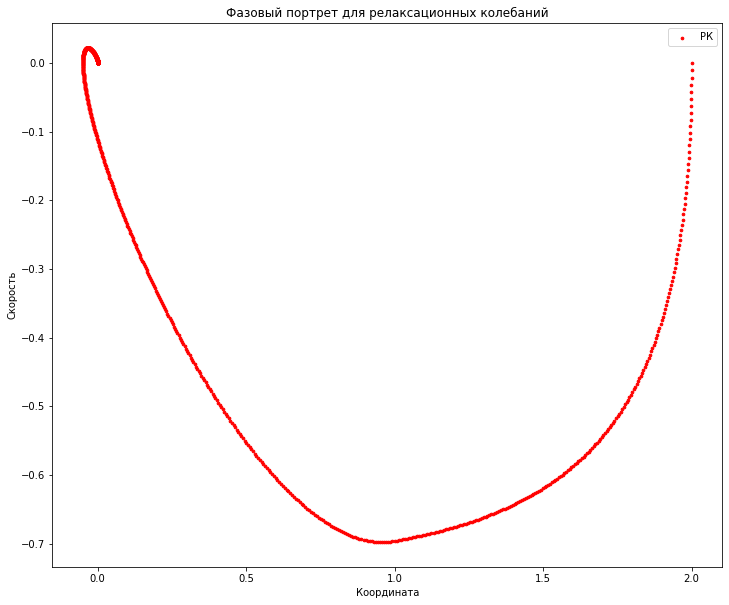

In [37]:
plt.figure(figsize=(12,10))
plt.scatter(x,y,label='РК',c='r',s=7)
# plt.plot(x_an[1:],y_an[1:], label = "analytics")

plt.title("Фазовый портрет для релаксационных колебаний")
# plt.xlim(right=75,left=-0.1)
plt.legend()

plt.xlabel('Координата')
plt.ylabel('Скорость')
plt.show()

### Зависимость периода от амплитуды

Возьмем различные начальные условия $x_0$ от 0.001 до 100 с шагом 0.01



In [38]:
# Правльный вариант
# t_step = 0.01
# dtype=np.float128
# an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
# shape = an_t.shape[0]
# delta = 0
# # an_x = np.arange(-2.,2,step=t_step)
#
# c2= np.arange(start=0.001,stop=100,step=0.01)
# T = np.zeros(c2.shape[0],dtype=dtype)
# for l in range(c2.shape[0]):
#     x, y = np.zeros(shape,dtype=dtype), np.zeros(shape,dtype=dtype)
#     x[0] = c2[l]
#     y[0] = 0
#     k1_1, k2_1, k3_1,k4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
#     q1_1, q2_1, q3_1,q4_1 = np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype),np.zeros(shape,dtype=dtype)
#     # с2 = np.array(c1.shape())
#     for i in range(an_t.shape[0] - 1):
#             if x[i] <= 1:
#                 k1_1[i] = -1 * t_step * (delta * y[i] + 0.1 * x[i] ** 3 + x[i])
#                 q1_1[i] = t_step * (y[i])
#
#                 k2_1[i] = -1 * t_step * (delta * (y[i] + 0.5 * k1_1[i]) + 0.1 * (x[i] + 0.5 * q1_1[i]) ** 3 + x[i] + 0.5 * q1_1[i])
#                 q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])
#
#                 k3_1[i] = -1 * t_step * (delta * (y[i] + 0.5 * k2_1[i]) + 0.1 * (x[i] + 0.5 * q2_1[i]) ** 3 + x[i] + 0.5 * q2_1[i])
#                 q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])
#
#                 k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 0.1 * (x[i] + q3_1[i]) ** 3 + x[i] + q3_1[i])
#                 q4_1[i] = t_step * (y[i] + k3_1[i])
#
#                 x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
#                 y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
#             else:
#                 k1_1[i] = -1 * t_step * (delta * y[i] + 1.1)
#                 q1_1[i] = t_step * (y[i])
#
#                 k2_1[i] = -1 * t_step * (delta * (y[i] + k1_1[i]) + 1.1)
#                 q2_1[i] = t_step * (y[i] + 0.5 * k1_1[i])
#
#                 k3_1[i] = -1 * t_step * (delta * (y[i] + k2_1[i]) + 1.1)
#                 q3_1[i] = t_step * (y[i] + 0.5 * k2_1[i])
#
#                 k4_1[i] = -1 * t_step * (delta * (y[i] + k3_1[i]) + 1.1)
#                 q4_1[i] = t_step * (y[i] + k3_1[i])
#
#                 x[i + 1] = x[i] + 1 / 6 * (q1_1[i] + 2 * q2_1[i] + 2 * q3_1[i] + q4_1[i])
#                 y[i + 1] = y[i] + 1 / 6 * (k1_1[i] + 2 * k2_1[i] + 2 * k3_1[i] + k4_1[i])
#
#     for j in range(x.shape[0]):
#         if x[j] <= x[j+1]:
#             T[l] = an_t[j]
#             break
#


ValueError: x and y must have same first dimension, but have shapes (1,) and (10000,)

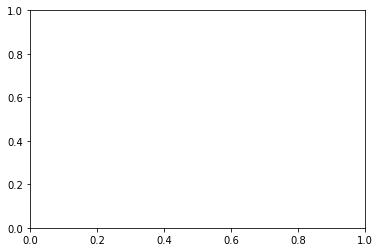

In [39]:
plt.plot(c2,T)
plt.xlabel('Амплитуда')
plt.ylabel('Период колебаний')
# plt.imsave(fname='1',arr=pl)
